<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_03_11-Aula_05/_02_Balan%C3%A7o_H%C3%ADdrico_balan%C3%A7os_base_CABra_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balanço Hídrico com dados da Base CABra

Vamos analisar o balanço hídrico

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [ ]:
# Atualizar o Google Download
!pip install --upgrade --no-cache-dir gdown

## Download dos dados na máquina virtual Google


In [ ]:
# Baixa dados da base CABra
!gdown 16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4

Downloading...
From: https://drive.google.com/uc?id=16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4
To: /content/CABra_1_climate+streamflow_edit.csv
100% 904k/904k [00:00<00:00, 84.7MB/s]


## Leitura dos dados hidrológicos

In [ ]:
# leitura dos dados com pandas
df = pd.read_csv('CABra_1_climate+streamflow_edit.csv')
df

,data,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
0,1980-10-01,4.669,22.521,31.019,85.222,0.694,17.078,3.777,4.381,5.276,4.199,1165.800
1,1980-10-02,11.884,22.645,31.321,82.020,0.760,15.329,4.022,4.040,4.781,3.780,1181.200
2,1980-10-03,9.195,22.308,30.400,86.096,0.615,15.450,4.173,3.985,4.791,3.761,1194.400
3,1980-10-04,9.348,21.887,30.540,85.902,0.691,15.414,3.898,4.003,4.778,3.745,1201.000
4,1980-10-05,14.407,19.680,26.941,88.454,1.502,11.080,2.477,3.103,3.475,2.521,1203.200
...,...,...,...,...,...,...,...,...,...,...,...,...
10952,2010-09-26,1.146,23.299,34.851,71.702,1.472,21.459,3.495,5.956,6.675,5.541,938.606
10953,2010-09-27,0.545,22.975,35.614,68.785,1.633,23.953,3.689,6.683,7.431,6.214,933.871
10954,2010-09-28,0.289,24.676,36.276,63.917,1.830,23.573,3.364,6.664,7.406,6.268,931.509
10955,2010-09-29,0.471,24.860,36.267,63.736,1.714,23.042,3.368,6.491,7.252,6.139,933.871


In [ ]:
df['data'] = pd.to_datetime(df['data'])
df = df.set_index('data')
df

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
data,,,,,,,,,,,
1980-10-01,4.669,22.521,31.019,85.222,0.694,17.078,3.777,4.381,5.276,4.199,1165.800
1980-10-02,11.884,22.645,31.321,82.020,0.760,15.329,4.022,4.040,4.781,3.780,1181.200
1980-10-03,9.195,22.308,30.400,86.096,0.615,15.450,4.173,3.985,4.791,3.761,1194.400
1980-10-04,9.348,21.887,30.540,85.902,0.691,15.414,3.898,4.003,4.778,3.745,1201.000
1980-10-05,14.407,19.680,26.941,88.454,1.502,11.080,2.477,3.103,3.475,2.521,1203.200
...,...,...,...,...,...,...,...,...,...,...,...
2010-09-26,1.146,23.299,34.851,71.702,1.472,21.459,3.495,5.956,6.675,5.541,938.606
2010-09-27,0.545,22.975,35.614,68.785,1.633,23.953,3.689,6.683,7.431,6.214,933.871
2010-09-28,0.289,24.676,36.276,63.917,1.830,23.573,3.364,6.664,7.406,6.268,931.509


# Gráfico chuva $\times$ vazão

In [ ]:
Q = df['Streamflow(m3/s)']['1983-01-01':'1983-12-31']
P = df['p_ens(mm)']['1983-01-01':'1983-12-31']
index_prec = df['1983-01-01':'1983-12-31'].index

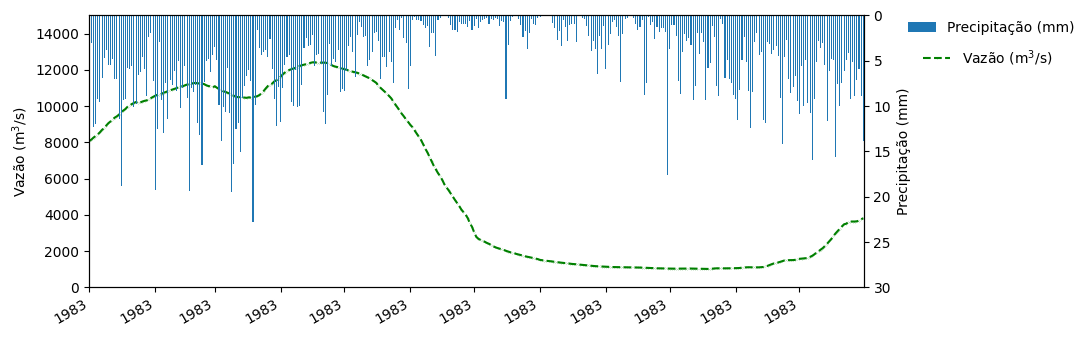

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(Q,color='green', marker='o', linestyle='dashed',linewidth=1.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.set_ylim(0,15000)
ax1.margins(0.0)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label

ax1.legend(bbox_to_anchor=(1.25, 0.9), borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(index_prec,P, width=0.5, label = 'Precipitação (mm)')

ax2.set_ylabel('Precipitação (mm)', fontsize=10) #y label
ax2.set_ylim(30,0)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.savefig('vazao_versus_prec_selecao.png', dpi = 300, bbox_inches='tight')
plt.show()

## Só visualizamos um ano, mas todo ano é igual?


Vamos visualizar o comportamento médio dos quase 30 anos de dados

In [ ]:
df_anual = df.copy()
df_anual['month'] = df_anual.index.month
df_anual = df_anual.groupby('month').mean()
df_anual

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
month,,,,,,,,,,,
1,9.004987,22.404224,30.115692,85.804763,0.852352,16.114616,4.456416,4.155008,4.991125,3.922342,8033.452423
2,9.553745,22.312894,30.090956,86.011610,0.767031,15.767460,4.663928,4.062584,4.888299,3.831891,10741.304882
3,8.870501,22.349787,30.160810,86.480265,0.742498,15.498083,4.448151,3.999347,4.806068,3.771353,12049.813151
4,6.892424,22.101998,29.988378,86.792781,0.747581,15.084708,4.039018,3.886370,4.659430,3.654160,12373.066838
5,3.848882,21.330865,29.480405,85.858780,0.807309,14.600013,3.463968,3.752873,4.464165,3.483324,11574.445033
6,1.944464,20.283269,29.391241,84.134369,0.799403,14.958260,2.916501,3.827571,4.514409,3.521840,7523.532596
7,1.290452,19.666427,30.250535,79.205146,0.871629,16.678151,2.950089,4.286943,4.991442,3.933595,3015.734096
8,1.843329,20.506639,31.703048,76.080669,0.871206,17.627961,3.248299,4.619009,5.350842,4.268639,1577.403891
9,3.480901,21.436686,31.836218,77.884980,0.882606,18.304743,3.640549,4.783361,5.609019,4.494181,1232.226499


In [ ]:
!mkdir graficos

mkdir: cannot create directory ‘graficos’: File exists


In [ ]:
Q = df_anual['Streamflow(m3/s)']
P = df_anual['p_ens(mm)']
index_prec = df_anual.index

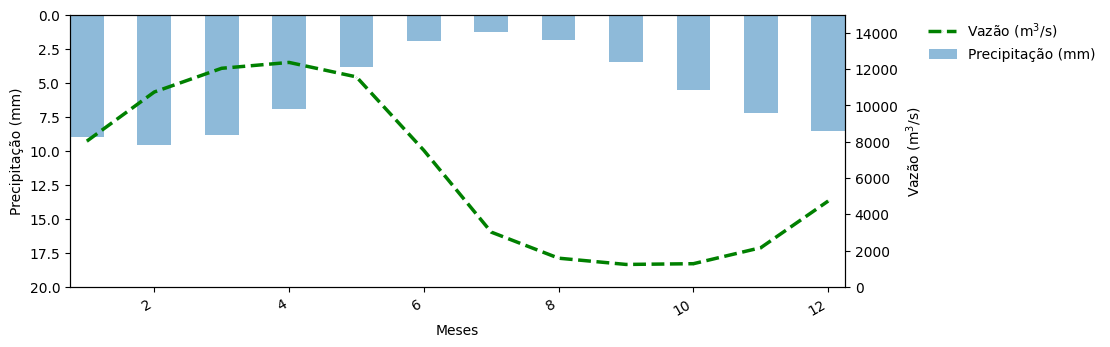

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.margins(0.0)
ax1.bar(index_prec,P, width=0.5, label = 'Precipitação (mm)',alpha=0.5)

plt.gcf().autofmt_xdate()
ax1.set_ylabel('Precipitação (mm)', fontsize=10) #y label
ax1.set_xlabel('Meses', fontsize=10) #y label
ax1.set_ylim(20,0)

ax1.legend(bbox_to_anchor=(1.33, 0.9), borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)

ax2.plot(Q,color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax2.set_ylim(0,15000)

ax2.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.savefig('graficos/vazao_versus_prec_selecao.png', dpi = 300, bbox_inches='tight')
plt.show()

# Vamos comparar os dados históricos?

https://pt.wikipedia.org/wiki/Rio_Acre


Rio Branco como referência: Cota máxima da alagação

* 2015 chegou à marca de 18,40 metros
* 1997 chegou à marca de 17,66 metros
* 1988 chegou à marca de 17,12 metros

<Axes: xlabel='data'>

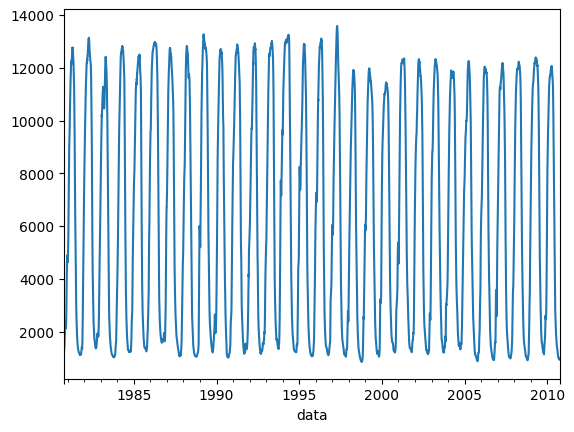

In [ ]:
df['Streamflow(m3/s)'].plot()

<Axes: xlabel='data'>

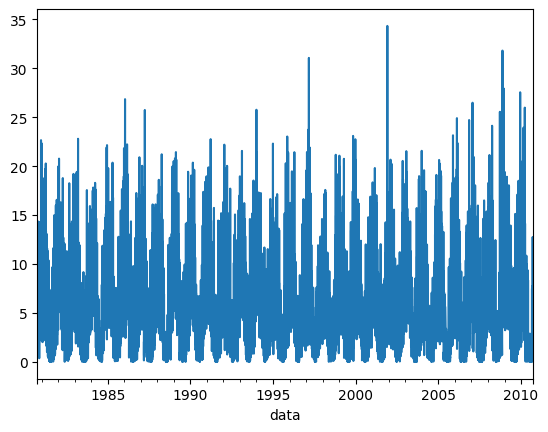

In [ ]:
df['p_ens(mm)'].plot()

In [ ]:
df.index

DatetimeIndex(['1980-10-01', '1980-10-02', '1980-10-03', '1980-10-04',
               '1980-10-05', '1980-10-06', '1980-10-07', '1980-10-08',
               '1980-10-09', '1980-10-10',
               ...
               '2010-09-21', '2010-09-22', '2010-09-23', '2010-09-24',
               '2010-09-25', '2010-09-26', '2010-09-27', '2010-09-28',
               '2010-09-29', '2010-09-30'],
              dtype='datetime64[ns]', name='data', length=10957, freq=None)

# Incluindo a Evapotranspiração

A plataforma CABra apresenta dados de Evapotranspiração do modelo GLEAM

* GLEAM = Global Land Evaporation Amsterdam Model

https://www.gleam.eu/

### Transformar unidades

#### CABra 1 - Rio Purus

* Área de drenagem 243410.30 Km$^2$ (site do CABra)
* Área de drenagem 236301.98 Km$^2$ (calculado por nós - Aula 2)

Vazão Q m$^3$/s -> mm/d

* 1 km  =  1000 m
* 1 km$^2$ = ($1000$ m)$^2$ = $(10^3)^2$ m$^2$ = $10^6$ m$^2$

* 243410.3 Km$^2$ = $243410.3 \times 10^6$ m$^2$


Vazão por unidade de área:

Q / A   -> m/s

* 1 m = 1000 mm

(Q / A) * 1000  -> mm/s

* 1 dia = 86400 s
* 1 s = 1/86400 dia

(Q / A) * 1000 * 86400  -> mm/dia

In [ ]:
area_CABra1 = 243410.30*1000000 # m2

In [ ]:
df['Q(mm/dia)'] = (df['Streamflow(m3/s)']/area_CABra1)*1000*86400
df

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s),Q(mm/dia)
data,,,,,,,,,,,,
1980-10-01,4.669,22.521,31.019,85.222,0.694,17.078,3.777,4.381,5.276,4.199,1165.800,0.413808
1980-10-02,11.884,22.645,31.321,82.020,0.760,15.329,4.022,4.040,4.781,3.780,1181.200,0.419274
1980-10-03,9.195,22.308,30.400,86.096,0.615,15.450,4.173,3.985,4.791,3.761,1194.400,0.423960
1980-10-04,9.348,21.887,30.540,85.902,0.691,15.414,3.898,4.003,4.778,3.745,1201.000,0.426302
1980-10-05,14.407,19.680,26.941,88.454,1.502,11.080,2.477,3.103,3.475,2.521,1203.200,0.427083
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-09-26,1.146,23.299,34.851,71.702,1.472,21.459,3.495,5.956,6.675,5.541,938.606,0.333164
2010-09-27,0.545,22.975,35.614,68.785,1.633,23.953,3.689,6.683,7.431,6.214,933.871,0.331483
2010-09-28,0.289,24.676,36.276,63.917,1.830,23.573,3.364,6.664,7.406,6.268,931.509,0.330645


In [ ]:
df_anual = df.copy()
df_anual['month'] = df_anual.index.month
df_anual = df_anual.groupby('month').mean()
df_anual

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s),Q(mm/dia)
month,,,,,,,,,,,,
1,9.004987,22.404224,30.115692,85.804763,0.852352,16.114616,4.456416,4.155008,4.991125,3.922342,8033.452423,2.851524
2,9.553745,22.312894,30.090956,86.011610,0.767031,15.767460,4.663928,4.062584,4.888299,3.831891,10741.304882,3.812693
3,8.870501,22.349787,30.160810,86.480265,0.742498,15.498083,4.448151,3.999347,4.806068,3.771353,12049.813151,4.277156
4,6.892424,22.101998,29.988378,86.792781,0.747581,15.084708,4.039018,3.886370,4.659430,3.654160,12373.066838,4.391897
5,3.848882,21.330865,29.480405,85.858780,0.807309,14.600013,3.463968,3.752873,4.464165,3.483324,11574.445033,4.108421
6,1.944464,20.283269,29.391241,84.134369,0.799403,14.958260,2.916501,3.827571,4.514409,3.521840,7523.532596,2.670525
7,1.290452,19.666427,30.250535,79.205146,0.871629,16.678151,2.950089,4.286943,4.991442,3.933595,3015.734096,1.070454
8,1.843329,20.506639,31.703048,76.080669,0.871206,17.627961,3.248299,4.619009,5.350842,4.268639,1577.403891,0.559909
9,3.480901,21.436686,31.836218,77.884980,0.882606,18.304743,3.640549,4.783361,5.609019,4.494181,1232.226499,0.437386


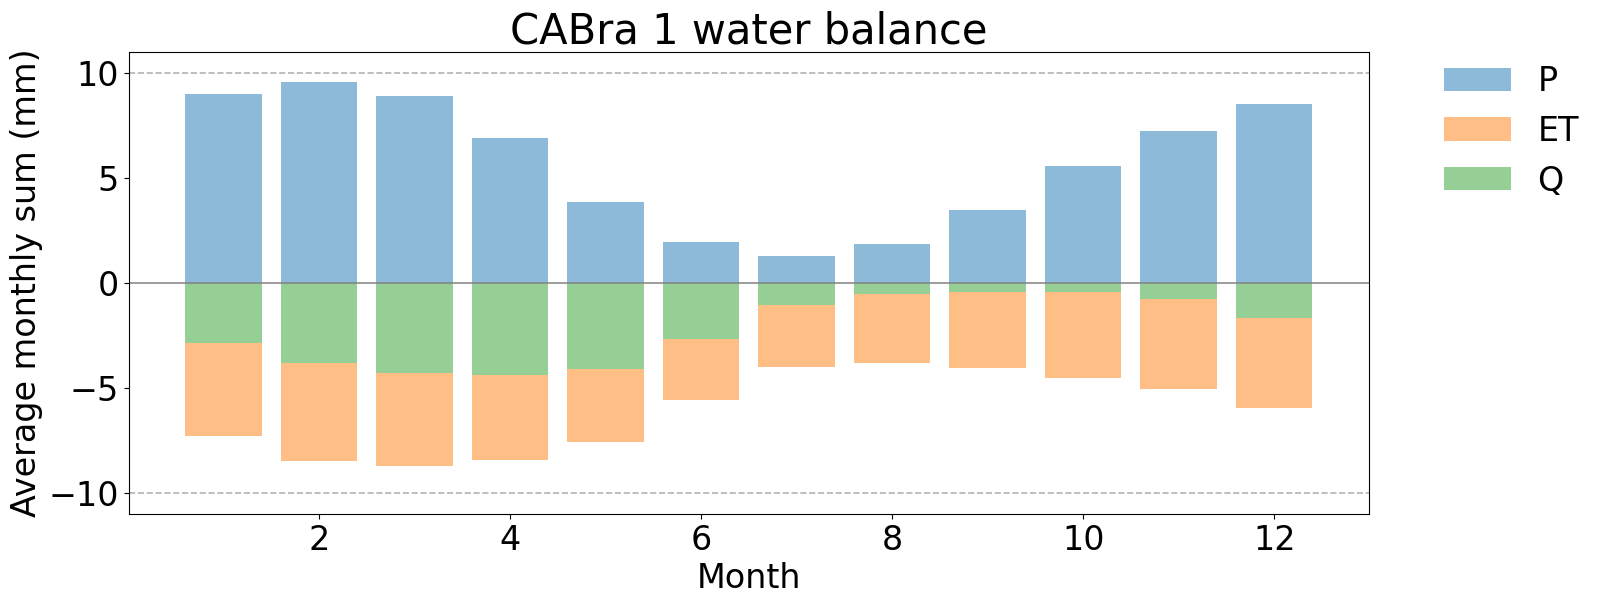

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(df_anual.index, df_anual['p_ens(mm)'], width=0.8, label='P',alpha=0.5)
plt.axhline(y = 0.0, color = 'gray', linestyle = '-',linewidth=1.2,alpha=0.9)
plt.bar(df_anual.index, -df_anual['et_ens(mm)'], width=0.8, bottom = -df_anual['Q(mm/dia)'], label='ET',alpha=0.5)
plt.bar(df_anual.index, -df_anual['Q(mm/dia)'], width=0.8, label='Q',alpha=0.5)
#plt.plot(df_anual.index, df_anual['deltaS'], label='Delta S', marker='o' , color = 'black')

# specifying horizontal line type
plt.axhline(y = 10.0, color = 'black', linestyle = '--',linewidth=1.2,alpha=0.3)
plt.axhline(y = -10.0, color = 'black', linestyle = '--',linewidth=1.2,alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=24)
plt.xlabel('Month', fontsize=24) #x label
#plt.ylim([-3, 3])
plt.ylabel(r'Average monthly sum (mm)', fontsize=24) #y label
plt.title(r'CABra 1 water balance', fontsize=30) #y label
plt.tick_params(axis='both', labelsize=24) #increase font size for ticks
plt.savefig('graficos/bar_plot_CABra1_water_balance.png', dpi = 300, bbox_inches='tight')
plt.show();

# Gráfico duplo-acumulado

Aplicar o método do balanço hídrico por meio da curva duplo acumulada $\sum P_i$ (eixo x) versus $\sum\left(E T_i+Q_i\right)$ (eixo y)


In [ ]:
df.columns

Index(['p_ens(mm)', 'tmin_ens(oC)', 'tmax_ens(oC)', 'rh_ens(%)',
       'wnd_ens(m/s)', 'srad_ens(MJm-2)', 'et_ens(mm)', 'pet_pm(mm)',
       'pet_pt(mm)', 'pet_hg(mm)', 'Streamflow(m3/s)', 'Q(mm/dia)'],
      dtype='object')

In [ ]:
# Escolhendo somente as variaveis de interesse agora
df_sel = df[['p_ens(mm)','et_ens(mm)','Q(mm/dia)']]
df_sel

,p_ens(mm),et_ens(mm),Q(mm/dia)
data,,,
1980-10-01,4.669,3.777,0.413808
1980-10-02,11.884,4.022,0.419274
1980-10-03,9.195,4.173,0.423960
1980-10-04,9.348,3.898,0.426302
1980-10-05,14.407,2.477,0.427083
...,...,...,...
2010-09-26,1.146,3.495,0.333164
2010-09-27,0.545,3.689,0.331483
2010-09-28,0.289,3.364,0.330645


In [ ]:
acumulado = df_sel.cumsum()
acumulado

,p_ens(mm),et_ens(mm),Q(mm/dia)
data,,,
1980-10-01,4.669,3.777,0.413808
1980-10-02,16.553,7.799,0.833082
1980-10-03,25.748,11.972,1.257042
1980-10-04,35.096,15.870,1.683344
1980-10-05,49.503,18.347,2.110428
...,...,...,...
2010-09-26,61851.963,42359.292,24614.648261
2010-09-27,61852.508,42362.981,24614.979745
2010-09-28,61852.797,42366.345,24615.310390


In [ ]:
entradas0 = acumulado['p_ens(mm)']
saidas0   = acumulado['et_ens(mm)'] + acumulado['Q(mm/dia)']

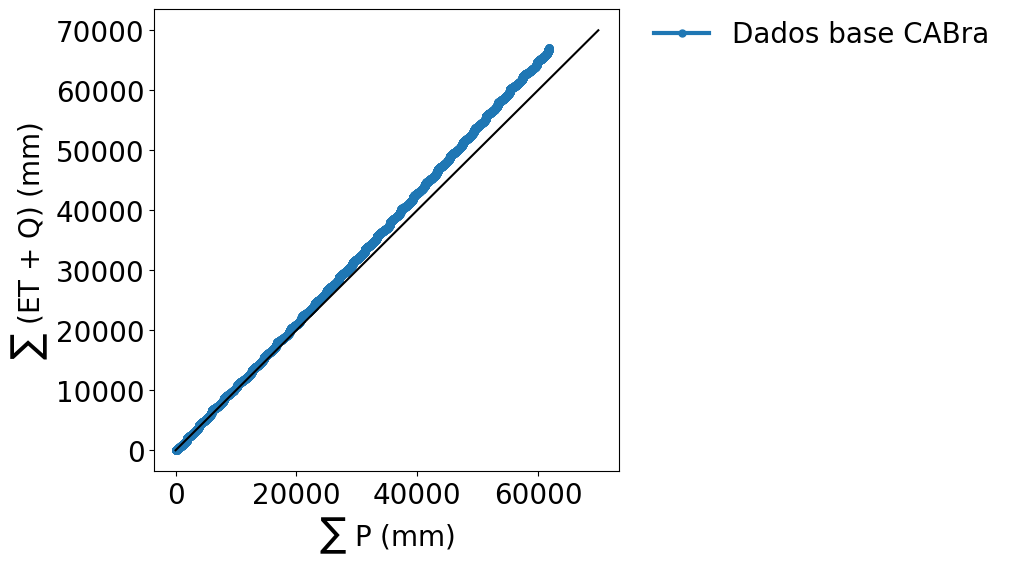

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(entradas0,saidas0,'o-',linewidth = 3,markersize = 5, markeredgewidth = 1, label='Dados base CABra')
z = numpy.array([0, 70000])
plt.plot(z,z,color='black')

plt.tick_params(axis='both', labelsize=20) #increase font size for ticks
plt.xlabel(r'$\sum$ P (mm)', fontsize=20) #x label
plt.ylabel(r'$\sum$ (ET + Q) (mm)', fontsize=20) #y label
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=20)
plt.savefig('graficos/duplo_acumulado_Cabra1_v0.png', dpi = 300, bbox_inches='tight')
plt.show();

In [ ]:
entradas0[-1]

61854.07099999998

In [ ]:
saidas0[-1]

66989.13919565544

In [ ]:
saidas0[-1] - entradas0[-1]

5135.068195655462

# Curva de Permanência

In [ ]:
curva_permanencia = np.zeros(100)
porcentagem_excedencia = 100 - (np.arange(100))

for i in range(100):
  curva_permanencia[i] = np.percentile(df['Streamflow(m3/s)'],i+1)

In [ ]:
porcentagem_excedencia

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [ ]:
curva_permanencia

array([  955.179  ,  1019.00812,  1052.4    ,  1073.4    ,  1098.2552 ,
        1123.414  ,  1147.39616,  1174.762  ,  1201.     ,  1221.972  ,
        1237.76664,  1257.456  ,  1276.6    ,  1303.     ,  1328.924  ,
        1351.     ,  1379.1784 ,  1405.65408,  1438.624  ,  1474.78   ,
        1506.7    ,  1540.04   ,  1580.12   ,  1617.03556,  1660.28   ,
        1699.8    ,  1751.1482 ,  1821.4    ,  1894.6    ,  1959.2    ,
        2053.14868,  2157.23528,  2267.0656 ,  2388.4624 ,  2499.2808 ,
        2604.16   ,  2724.44   ,  2886.28888,  3049.533  ,  3204.465  ,
        3380.492  ,  3585.551  ,  3797.26928,  4041.76   ,  4306.1078 ,
        4566.2    ,  4785.68   ,  5026.49424,  5280.44248,  5518.961  ,
        5789.03056,  6007.96   ,  6273.543  ,  6604.1356 ,  6920.22   ,
        7208.48   ,  7485.98   ,  7746.48   ,  8026.66972,  8316.9876 ,
        8597.74104,  8852.51152,  9109.12   ,  9369.16   ,  9572.5    ,
        9744.7    ,  9966.1    , 10151.88712, 10354.04812, 10547

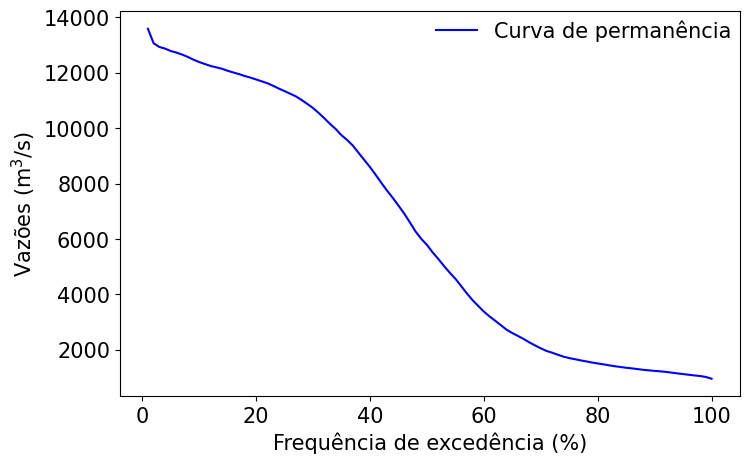

In [ ]:
# Plotar grafico
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 15})
plt.plot(porcentagem_excedencia, curva_permanencia, label='Curva de permanência',color='blue')
plt.legend(loc='upper right', borderaxespad=0.,frameon=False, fontsize=15)
plt.ylabel(r'Vazões (m$^3$/s)', fontsize=15) #y label
plt.xlabel(r'Frequência de excedência (%)', fontsize=15) #y label
plt.show();

In [ ]:
df_anual_dia = df.copy()
df_anual_dia['dia'] = df_anual_dia.index.dayofyear
df_anual_dia = df_anual_dia.groupby('dia').mean()
df_anual_dia

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s),Q(mm/dia)
dia,,,,,,,,,,,,
1,8.734067,22.355967,29.997067,85.823933,0.860400,15.968167,4.505367,4.118900,4.946033,3.880433,6494.673833,2.305325
2,9.737333,22.413833,30.067000,85.937867,0.886233,16.122267,4.397000,4.157400,4.992767,3.923467,6583.497633,2.336853
3,8.531267,22.398467,30.286600,84.785300,0.862333,16.685233,4.461733,4.286800,5.154700,4.066433,6671.633833,2.368138
4,8.284700,22.422267,30.275300,85.315633,0.912533,16.427833,4.425867,4.245267,5.083067,4.005267,6770.869433,2.403362
5,8.232400,22.511200,30.248167,85.264333,0.917700,16.442367,4.559533,4.244500,5.089233,4.012667,6862.396167,2.435850
...,...,...,...,...,...,...,...,...,...,...,...,...
362,8.515567,22.366233,30.254800,85.370567,0.866100,16.563133,4.386767,4.264700,5.121133,4.037400,6107.434533,2.167872
363,8.241267,22.449533,30.427400,84.994300,0.906900,17.143300,4.355000,4.409567,5.291567,4.189467,6207.125367,2.203258
364,9.356633,22.508733,29.950667,85.802433,0.893233,15.937200,4.319600,4.104000,4.938233,3.875333,6302.569600,2.237136


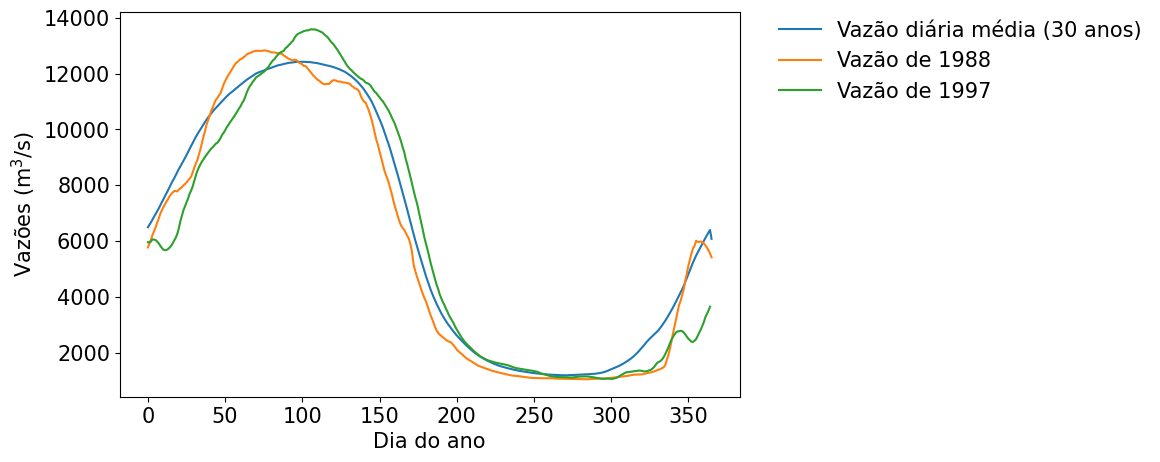

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_anual_dia['Streamflow(m3/s)'].values,label='Vazão diária média (30 anos)')
plt.plot(df['Streamflow(m3/s)']['1988-01-01':'1988-12-31'].values,label='Vazão de 1988')
plt.plot(df['Streamflow(m3/s)']['1997-01-01':'1997-12-31'].values,label='Vazão de 1997')
plt.ylabel(r'Vazões (m$^3$/s)', fontsize=15) #y label
plt.xlabel(r'Dia do ano', fontsize=15) #y label
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=15)
plt.show();

Qual foi a frequência de excedência do picos de vazão de 1988? e de 1997?

In [ ]:
df['Streamflow(m3/s)']['1988-01-01':'1988-12-31'].max(), df['Streamflow(m3/s)']['1997-01-01':'1997-12-31'].max()

(12828.0, 13589.131)

In [ ]:
Q95 = np.percentile(df['Streamflow(m3/s)'],5)
print('A vazão Q95 é: ', Q95, 'm3/s')

A vazão Q95 é:  1098.2552 m3/s


In [ ]:
Q90 = np.percentile(df['Streamflow(m3/s)'],10)
print('A vazão Q90 é: ', Q90, 'm3/s')

A vazão Q90 é:  1221.972 m3/s


In [ ]:
Q10 = np.percentile(df['Streamflow(m3/s)'],90)
print('A vazão Q10 é: ', Q10, 'm3/s')

A vazão Q10 é:  12315.36 m3/s


In [ ]:
np.percentile(df['Streamflow(m3/s)'],98) # 2% de excedência

12931.32

In [ ]:
np.percentile(df['Streamflow(m3/s)'],99) # 1% de excedência

13064.16

In [ ]:
np.percentile(df['Streamflow(m3/s)'],100) # máximo da série histórica

13589.131

# Outra maneira de calcular a Curva de Permanência

In [ ]:
df_vazoes = df[['Streamflow(m3/s)']].reset_index()
vazoes = df['Streamflow(m3/s)'].values
vazoes

array([  850.047,   852.273,   854.503, ..., 13575.774, 13589.131,
       13589.131])

## Step 1: Sort (rank) average daily discharges for period of record from the largest value to the smallest value, involving a total of n values.



In [ ]:
vazoes_ranqueada = np.sort(vazoes)
vazoes_ranqueada

array([  850.047,   852.273,   854.503, ..., 13575.774, 13589.131,
       13589.131])

In [ ]:
vazoes_ranqueada = vazoes_ranqueada[::-1]
vazoes_ranqueada

array([13589.131, 13589.131, 13575.774, ...,   854.503,   852.273,
         850.047])

In [ ]:
df_vazoes['Q_rank(m3/s)'] = vazoes_ranqueada
df_vazoes

,data,Streamflow(m3/s),Q_rank(m3/s)
0,1980-10-01,850.047,13589.131
1,1980-10-02,852.273,13589.131
2,1980-10-03,854.503,13575.774
3,1980-10-04,856.736,13575.774
4,1980-10-05,856.736,13562.427
...,...,...,...
10952,2010-09-26,13562.427,856.736
10953,2010-09-27,13575.774,856.736
10954,2010-09-28,13575.774,854.503
10955,2010-09-29,13589.131,852.273


## Step 2: Assign each discharge value a rank (M), starting with 1 for the largest daily discharge value.



In [ ]:
len(df_vazoes)

10957

In [ ]:
np.arange(1,len(df_vazoes)+1,1)

array([    1,     2,     3, ..., 10955, 10956, 10957])

In [ ]:
df_vazoes['M'] = np.arange(1,len(df_vazoes)+1,1)

In [ ]:
df_vazoes

,data,Streamflow(m3/s),Q_rank(m3/s),M
0,1980-10-01,850.047,13589.131,1
1,1980-10-02,852.273,13589.131,2
2,1980-10-03,854.503,13575.774,3
3,1980-10-04,856.736,13575.774,4
4,1980-10-05,856.736,13562.427,5
...,...,...,...,...
10952,2010-09-26,13562.427,856.736,10953
10953,2010-09-27,13575.774,856.736,10954
10954,2010-09-28,13575.774,854.503,10955
10955,2010-09-29,13589.131,852.273,10956


## Step 3: Calculate exceedence probability (P) as follows:

$$
P=100 \left[\frac{M}{(n+1)} \right]
$$

* $P=$ the probability that a given flow will be equaled or exceeded ( $\%$ of time)
* $M=$ the ranked position on the listing (dimensionless)
* $\mathrm{n}=$ the number of events for period of record (dimensioniess)

In [ ]:
df_vazoes['P'] = 100*(df_vazoes['M']/(len(df_vazoes)+1))
df_vazoes

,data,Streamflow(m3/s),Q_rank(m3/s),M,P
0,1980-10-01,850.047,13589.131,1,0.009126
1,1980-10-02,852.273,13589.131,2,0.018252
2,1980-10-03,854.503,13575.774,3,0.027377
3,1980-10-04,856.736,13575.774,4,0.036503
4,1980-10-05,856.736,13562.427,5,0.045629
...,...,...,...,...,...
10952,2010-09-26,13562.427,856.736,10953,99.954371
10953,2010-09-27,13575.774,856.736,10954,99.963497
10954,2010-09-28,13575.774,854.503,10955,99.972623
10955,2010-09-29,13589.131,852.273,10956,99.981748


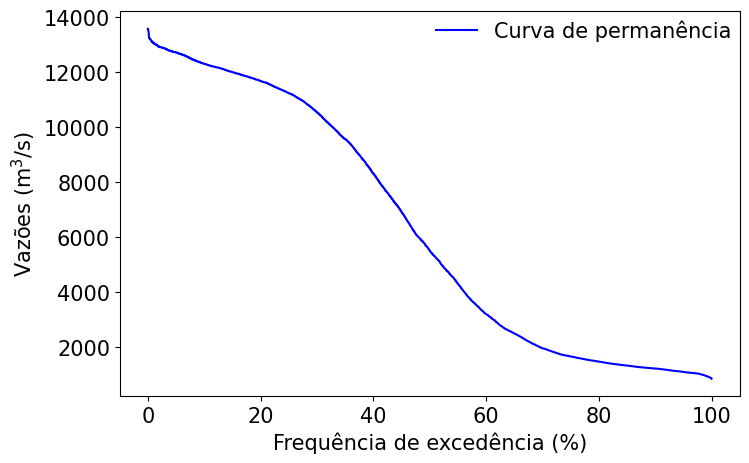

In [ ]:
# Plotar grafico
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 15})
#plt.yscale("log")
plt.plot(df_vazoes['P'].values,df_vazoes['Q_rank(m3/s)'].values, label='Curva de permanência',color='blue')
plt.legend(loc='upper right', borderaxespad=0.,frameon=False, fontsize=15)
plt.ylabel(r'Vazões (m$^3$/s)', fontsize=15) #y label
plt.xlabel(r'Frequência de excedência (%)', fontsize=15) #y label
plt.show();
